In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.datasets import fetch_openml

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

Vi hämtar MNIST-datasetet och kollar dess beskrivning.

In [2]:
mnist = fetch_openml ('mnist_784', version = 1, cache = True, as_frame = False)
print(mnist.DESCR) 

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [3]:
X = mnist['data']
y = mnist ['target'].astype(np.uint8)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

In [5]:
X_train.shape, y_train.shape,  X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

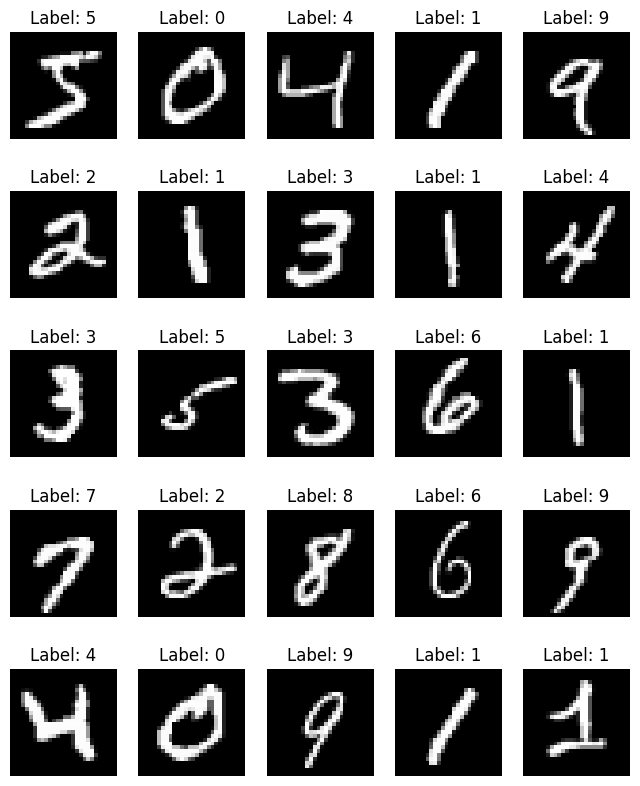

In [6]:
plt.figure(figsize=(8, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.show()

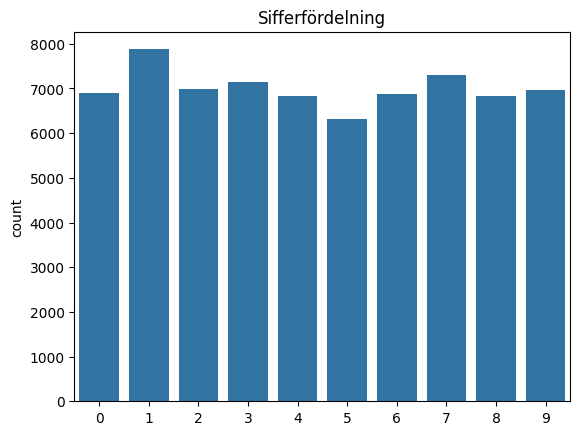

In [7]:
sns.countplot(x=y)
plt.title("Sifferfördelning")
plt.show()

### Förbereda data

In [5]:
# Normalisera data till intervallet (0,1)
X_train = X_train / 255
X_test = X_test / 255


In [6]:
#Standardisera data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#Dimensionsreducering genom använda PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Spara PCA
import joblib
joblib.dump(pca, "pca_mnist_model.pkl")

['pca_mnist_model.pkl']

### Modellering

Logistic Regression modell:

In [ ]:
# Cross_val_score för att få uppskattning av modells generaliseringsförmåga.
logistic_model = LogisticRegression(solver='saga', max_iter=5000)
log_reg_scores = cross_val_score(logistic_model, X_train_pca, y_train, cv=3)
print(f"Logistisk regression korsvalideringsnoggrannhet: {np.mean(log_reg_scores)}")


Logistisk regression korsvalideringsnoggrannhet: 0.9212333333333333


In [16]:
#Träna LogisticRegression modell:
logistic_model.fit(X_train_pca, y_train)

LogisticRegression(max_iter=5000, solver='saga')

In [53]:
# Noggranhet efter träning
y_train_pred_lg = logistic_model.predict(X_train_pca)
accuracy_train = accuracy_score(y_train, y_train_pred_lg)
print(f"Träningsnoggrannhet efter träning: {accuracy_train}")

Träningsnoggrannhet efter träning: 0.9335


In [54]:
# Spara modellen
joblib.dump(logistic_model, "LogisticRegression_model.pkl")

['LogisticRegression_model.pkl']

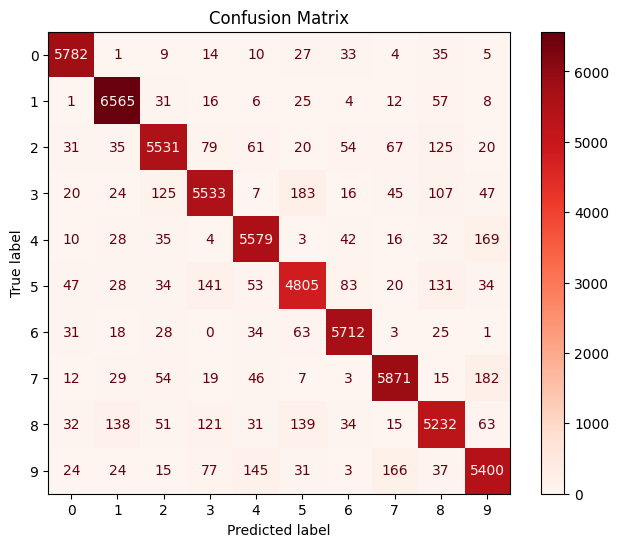

In [83]:
# Skapar confusion matrix för att få en bild av hur modellerna har presterat.
cm_lgr = confusion_matrix(y_train, y_train_pred_lg)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgr)
disp.plot(cmap =plt.cm.Reds, values_format= 'd', ax = ax)
plt.title("Confusion Matrix")
plt.show()

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred_lg))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      5920
           1       0.95      0.98      0.96      6725
           2       0.94      0.92      0.93      6023
           3       0.92      0.91      0.91      6107
           4       0.93      0.94      0.94      5918
           5       0.91      0.89      0.90      5376
           6       0.95      0.97      0.96      5915
           7       0.94      0.94      0.94      6238
           8       0.90      0.89      0.90      5856
           9       0.91      0.91      0.91      5922

    accuracy                           0.93     60000
   macro avg       0.93      0.93      0.93     60000
weighted avg       0.93      0.93      0.93     60000



Support Vector Machines modell:

In [ ]:
# Cross_val_score för att få uppskattning av modells generaliseringsförmåga.
svm_clf = SVC(gamma="scale", random_state=42)
svm_clf_scores = cross_val_score(svm_clf, X_train_pca, y_train, cv=3)
print(f"SVM korsvalideringsnoggrannhet: {np.mean(svm_clf_scores)}")

SVM korsvalideringsnoggrannhet: 0.9628


In [65]:
# Träna SVC modellen
svm_clf.fit(X_train_pca, y_train)

SVC(random_state=42)

In [ ]:
# Noggrannhet efter träning 
y_train_pred_svc = svm_clf.predict(X_train_pca)
accuracy_train = accuracy_score(y_train, y_train_pred_svc)
print(f"Träningsnoggrannhet efter träning: {accuracy_train}")

Träningsnoggrannhet efter träning: 0.9853833333333334


In [67]:
#Sapara modellen
joblib.dump(svm_clf, "SVC_model.pkl")

['SVC_model.pkl']

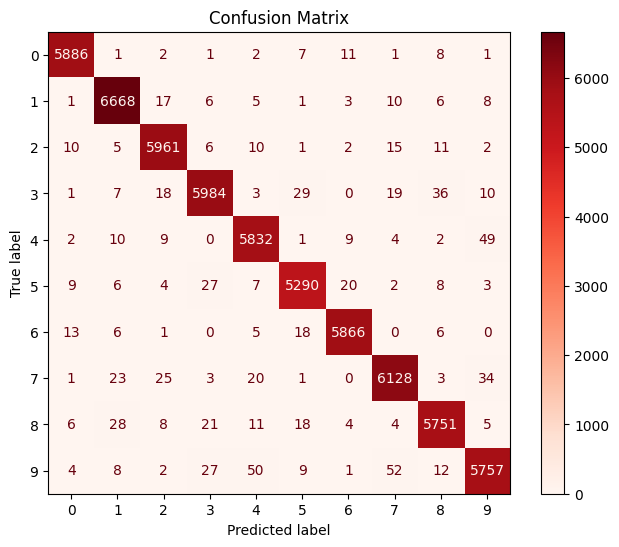

In [ ]:
# Skapar confusion matrix för att få en bild av hur modellerna har presterat.
cm_svc = confusion_matrix(y_train, y_train_pred_svc)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp.plot(cmap =plt.cm.Reds, values_format= 'd', ax = ax)
plt.title("Confusion Matrix")
plt.show()

In [70]:
print(classification_report(y_train, y_train_pred_svc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5920
           1       0.99      0.99      0.99      6725
           2       0.99      0.99      0.99      6023
           3       0.99      0.98      0.98      6107
           4       0.98      0.99      0.98      5918
           5       0.98      0.98      0.98      5376
           6       0.99      0.99      0.99      5915
           7       0.98      0.98      0.98      6238
           8       0.98      0.98      0.98      5856
           9       0.98      0.97      0.98      5922

    accuracy                           0.99     60000
   macro avg       0.99      0.99      0.99     60000
weighted avg       0.99      0.99      0.99     60000



Random Forest Classifier modell:

In [ ]:
# Cross_val_score för att få uppskattning av modells generaliseringsförmåga.
random_forest_clf= RandomForestClassifier(max_depth=10, n_estimators= 100)
random_forest_scores = cross_val_score(random_forest_clf, X_train_pca, y_train, cv=3)
print(f"Random Forest Classifier korsvalideringsnoggrannhet: {np.mean(random_forest_scores)}")

Random Forest Classifier korsvalideringsnoggrannhet: 0.9089833333333334


In [73]:
# Träna modellen
random_forest_clf.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
# Noggrannhet efter träning
y_train_pred_rf = random_forest_clf.predict(X_train_pca)
accuracy_train = accuracy_score(y_train, y_train_pred_rf)
print(f"Träningsnoggrannhet efter träning: {accuracy_train}")

Träningsnoggrannhet efter träning: 0.94625


In [94]:
# Spara modellen
joblib.dump(random_forest_clf, "RandomForest_classifier.pkl")

['RandomForest_classifier.pkl']

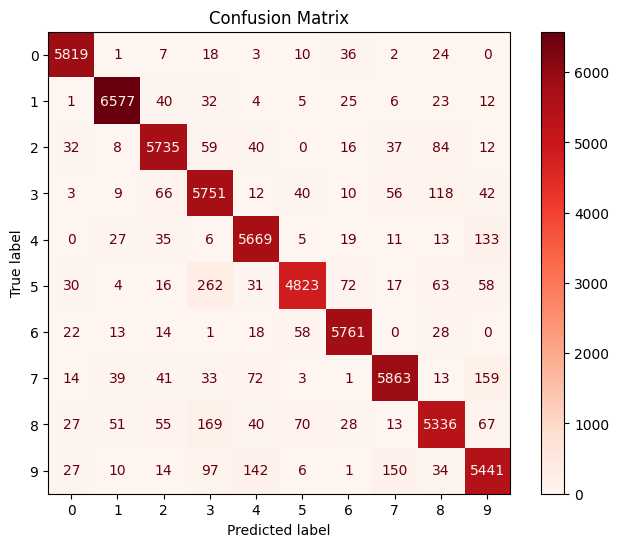

In [81]:
# Skapar confusion matrices för att få en bild av hur modellerna har presterat.
cm_rf = confusion_matrix(y_train, y_train_pred_rf)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot(cmap =plt.cm.Reds, values_format= 'd', ax = ax)
plt.title("Confusion Matrix")
plt.show()

In [76]:
print(classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      5920
           1       0.98      0.98      0.98      6725
           2       0.95      0.95      0.95      6023
           3       0.89      0.94      0.92      6107
           4       0.94      0.96      0.95      5918
           5       0.96      0.90      0.93      5376
           6       0.97      0.97      0.97      5915
           7       0.95      0.94      0.95      6238
           8       0.93      0.91      0.92      5856
           9       0.92      0.92      0.92      5922

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.95      0.95      0.95     60000



### Utvärdera den bästa modellen på test-setet

Support Vector Classifier modellen presterande bäst så den får utvärderas på test-datan.

In [17]:
svc_final = SVC()

#Ange parametrarna för att justera modellens beteende.
hyper_param_grid = [
    {'gamma': ['scale'], 'C': [5, 7], 'kernel': ['rbf']}
]

grid_search = GridSearchCV(svc_final, hyper_param_grid, cv= 3, n_jobs= -1, verbose = 2)
grid_search.fit(X_train_pca, y_train)

# Få de bästa parametrar och bäst modell
print("Bästa parametrar:", grid_search.best_params_)
best_svc = grid_search.best_estimator_

# Förutsägelser på testdata
y_pred = best_svc.predict(X_test_pca)

# Beräkna noggrannhet
accuracy = accuracy_score(y_test, y_pred)
print(f"Testnoggrannhet: {accuracy}")

# Spara modellen
joblib.dump(svc_final, "svc_model_final.joblib")
print("Modellen har sparats korrekt!")



Fitting 3 folds for each of 2 candidates, totalling 6 fits
Bästa parametrar: {'C': 7, 'gamma': 'scale', 'kernel': 'rbf'}
Testnoggrannhet: 0.9709
Modellen har sparats korrekt!


In [18]:
from sklearn.metrics import classification_report
y_pred = best_svc.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       983
           1       0.99      0.99      0.99      1152
           2       0.95      0.98      0.96       967
           3       0.97      0.96      0.97      1034
           4       0.97      0.97      0.97       906
           5       0.98      0.97      0.97       937
           6       0.97      0.98      0.98       961
           7       0.94      0.98      0.96      1055
           8       0.98      0.95      0.96       969
           9       0.98      0.95      0.96      1036

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



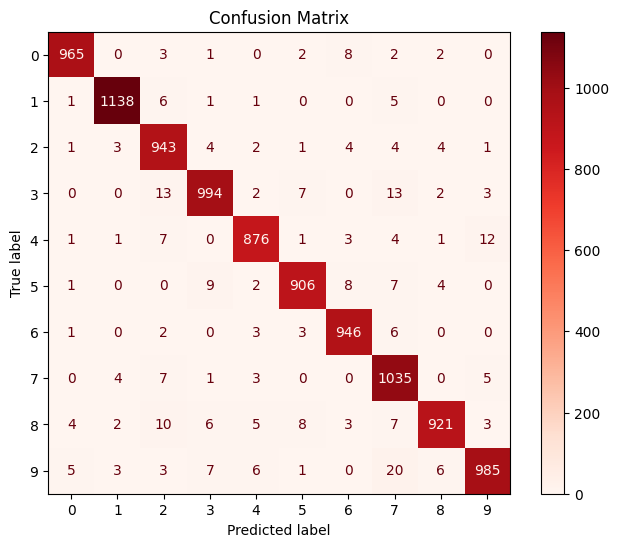

In [19]:
y_pred = best_svc.predict(X_test_pca)

#Confusion matrix
cm_svc_final = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc_final)
disp.plot(cmap =plt.cm.Reds, values_format= 'd', ax = ax)
plt.title("Confusion Matrix")
plt.show()